# Homework #2: Classifiers
Data source: https://www.kaggle.com/c/GiveMeSomeCredit


邓廷钦 Deng TingQin (Quintin) 2301212321

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/cs-training.csv', index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
data.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
data.fillna(data.mean(), inplace=True)
data.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [5]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
data.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
trainData = data.values
X, y = trainData[:, 1:], trainData[:, 0].astype('int')

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [8]:
import sklearn.preprocessing as skpre

stdsc = skpre.StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print(X_train_std.shape)
X_test_std = stdsc.transform(X_test)
print(X_test_std.shape)

(105000, 10)
(45000, 10)


## Find the most important two features
Logistic Regression with L1 penalty

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression(penalty='l1', C=1e-3, solver = 'liblinear')
lr.fit(X_train_std, y_train)
lr.coef_[lr.coef_ != 0] # check the number of the features with non-zero weights

array([-0.26252694,  0.1109982 ])

In [11]:
coefficients = lr.coef_
feature_names = data.columns[1:]
selected_features = [feature_names[i] for i in range(len(feature_names)) if any(coefficients[:, i] != 0)]
print("Selected features:", selected_features)

Selected features: ['age', 'NumberOfTime30-59DaysPastDueNotWorse']


In [12]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

In [13]:
X_train_std, X_test_std

(array([[ 0.59243692, -0.10038122],
        [ 1.066784  , -0.10038122],
        [-1.23718754, -0.10038122],
        ...,
        [-0.08520177, -0.10038122],
        [ 0.11808984, -0.10038122],
        [-0.96613207, -0.10038122]]),
 array([[-0.22072951,  0.13960667],
        [-0.08520177, -0.10038122],
        [-0.22072951, -0.10038122],
        ...,
        [-0.0174379 ,  0.37959455],
        [ 1.066784  , -0.10038122],
        [ 1.33783948, -0.10038122]]))

## LR

In [14]:
lr = LogisticRegression(penalty='l1', solver = 'liblinear')
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9333523809523809
Test accuracy: 0.9332666666666667


In [15]:
lr = LogisticRegression(penalty='l1', C=10, solver = 'liblinear')
lr.fit(X_train_std, y_train)

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9333523809523809
Test accuracy: 0.9332666666666667


## SVM

In [24]:
from sklearn.svm import SVC

In [25]:
svm = SVC()
svm.fit(X_train_std, y_train)

print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9334857142857143
Test accuracy: 0.9334444444444444


In [26]:
svm = SVC(degree=5)
svm.fit(X_train_std, y_train)

print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9334857142857143
Test accuracy: 0.9334444444444444


In [27]:
svm = SVC(degree=5, gamma = 'auto')
svm.fit(X_train_std, y_train)

print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9334857142857143
Test accuracy: 0.9334444444444444


In [28]:
svm = SVC(kernel = "sigmoid")
svm.fit(X_train_std, y_train)

print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.8906666666666667
Test accuracy: 0.8926666666666667


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

print('Training accuracy:', dt.score(X_train_std, y_train))
print('Test accuracy:', dt.score(X_test_std, y_test))

Training accuracy: 0.9349238095238095
Test accuracy: 0.9334


In [18]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_std, y_train)

print('Training accuracy:', dt.score(X_train_std, y_train))
print('Test accuracy:', dt.score(X_test_std, y_test))

Training accuracy: 0.9334380952380953
Test accuracy: 0.9330888888888889


In [19]:
dt = DecisionTreeClassifier(max_depth=3, criterion="entropy")
dt.fit(X_train_std, y_train)

print('Training accuracy:', dt.score(X_train_std, y_train))
print('Test accuracy:', dt.score(X_test_std, y_test))

Training accuracy: 0.9331619047619047
Test accuracy: 0.9331555555555555


## Visualize the classification

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

/tmp/ipykernel_8626/1026944365.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


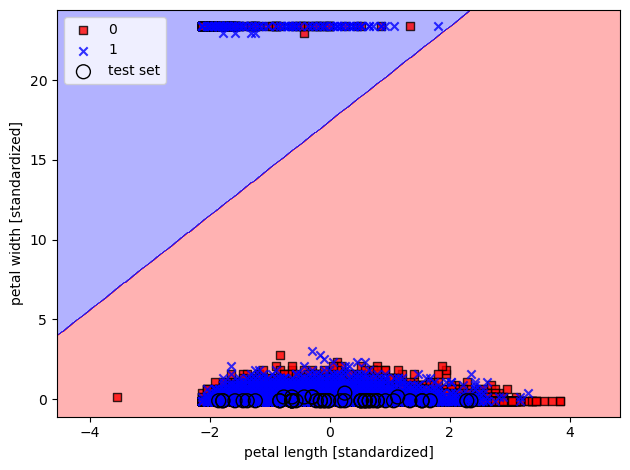

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

/tmp/ipykernel_8626/1026944365.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


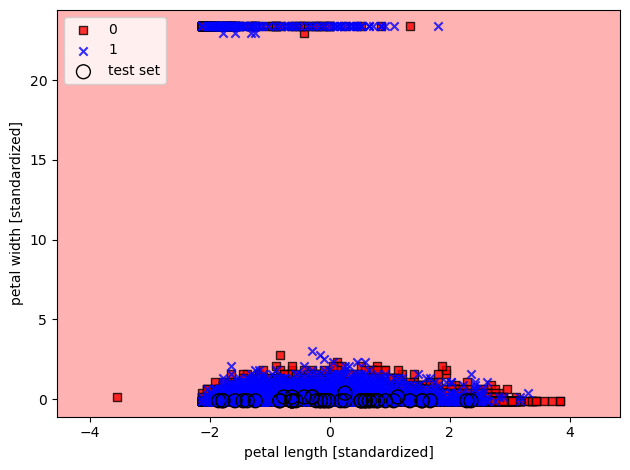

In [29]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=dt, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

/home/dtq/anaconda3/envs/rapids-23.12/lib/python3.10/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/tmp/ipykernel_8626/1026944365.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


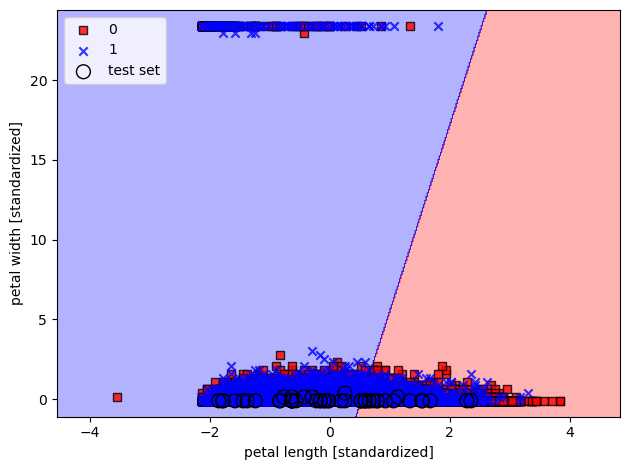

In [30]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel="linear", degree=1, max_iter=500)
svm.fit(X_train_std, y_train)

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()